##### Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Load dataset:

In [2]:
file_path = "data/chemicalsafetydata.csv"
chemical_safety_data = pd.read_csv(file_path)
print(chemical_safety_data.head())

   ID Chemical_Name CAS_Number Physical_State Chemical_Family Toxicity_Level  \
0   1    Chemical A    75-07-0          Solid            Acid         Medium   
1   2    Chemical B    75-07-0         Liquid           Ester           High   
2   3    Chemical A    75-07-0            Gas            Acid         Medium   
3   4    Chemical B    64-17-5            Gas            Acid         Medium   
4   5    Chemical B    64-17-5         Liquid            Acid         Medium   

  Flammability_Level Reactivity_Level Special_Hazard Data_Source  Label_Class  
0                NaN  Highly Reactive       Irritant    Source A            2  
1                Low  Highly Reactive       Irritant    Source A            0  
2                Low           Stable      Explosive    Source B            1  
3                Low  Highly Reactive      Corrosive    Source A            2  
4               High         Unstable      Explosive    Source A            1  


##### Create plots for distributions:

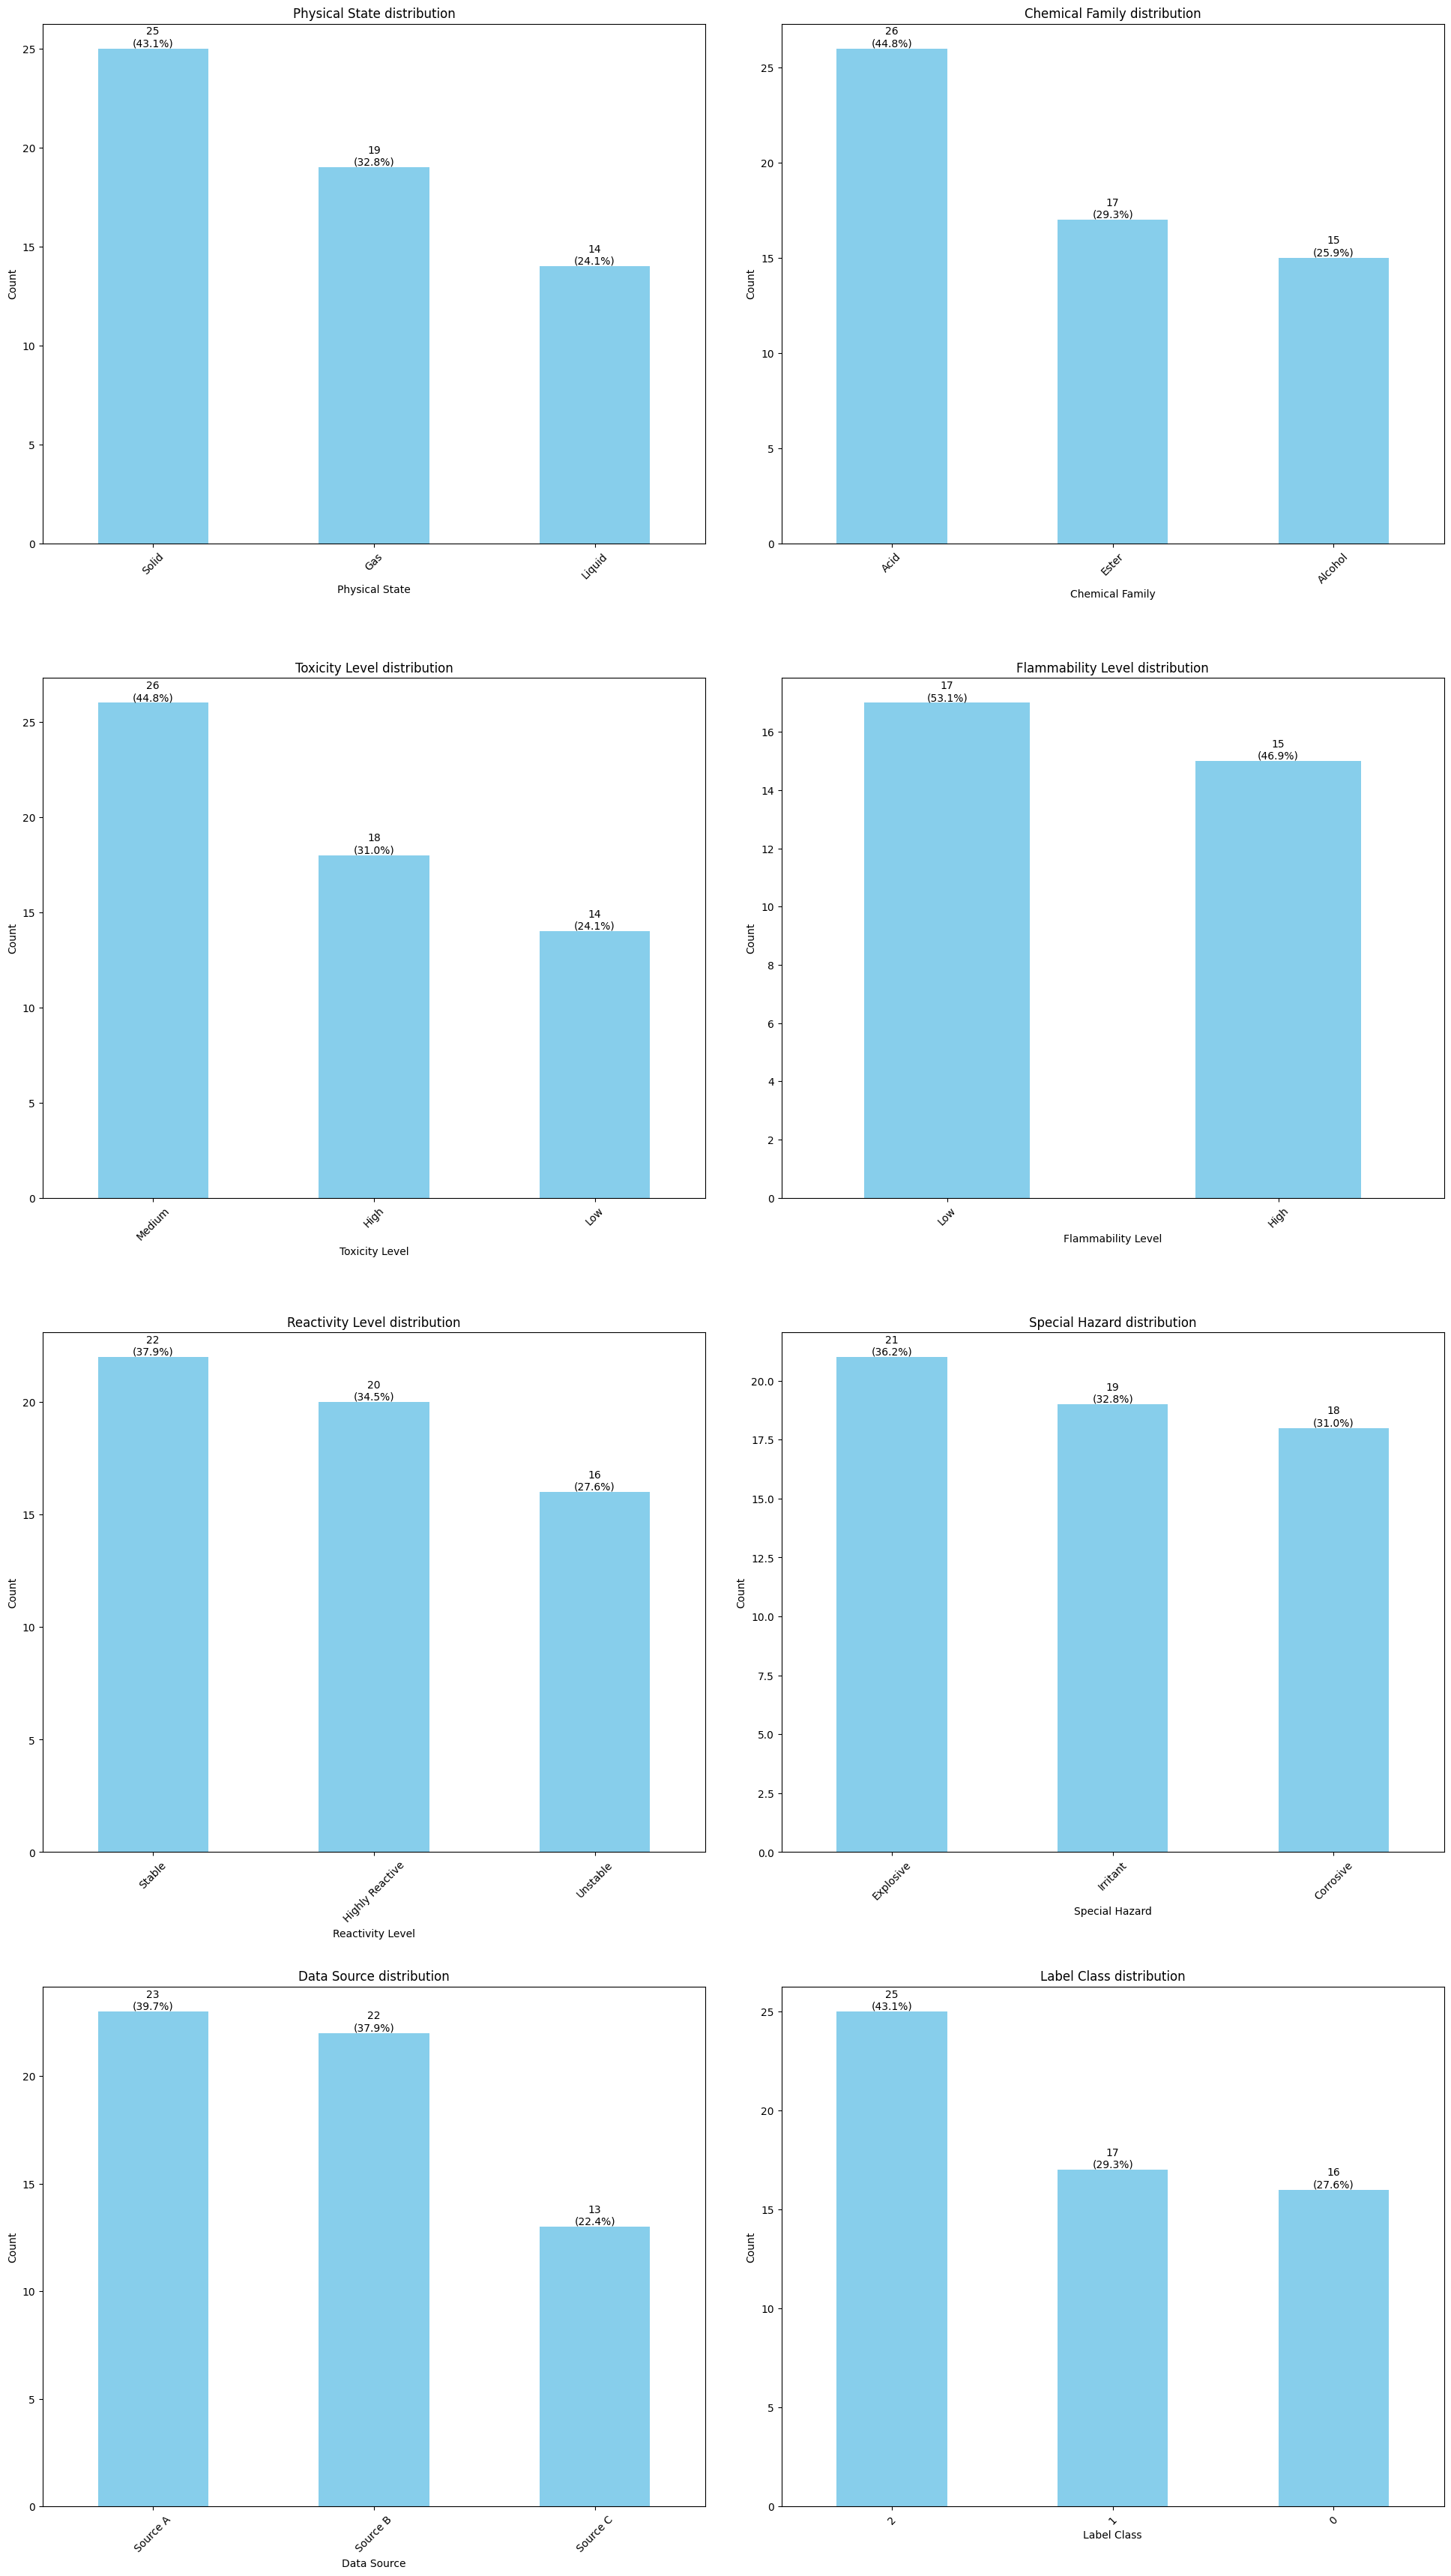

In [3]:
plt.figure(figsize=(20, 35))

columns_to_plot = [
    "Physical_State", "Chemical_Family", "Toxicity_Level", "Flammability_Level",
    "Reactivity_Level", "Special_Hazard", "Data_Source", "Label_Class"
]

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    value_counts = chemical_safety_data[column].value_counts()
    value_counts.plot(kind="bar", color="skyblue")
    plt.title(f"{column.replace('_', ' ')} distribution")
    plt.xlabel(column.replace('_', ' '))
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    
    for index, value in enumerate(value_counts):
        percentage = (value / value_counts.sum()) * 100
        plt.text(index, value, f"{value}\n({percentage:.1f}%)", ha="center", va="bottom")

plt.tight_layout(pad=3.0)
plt.show()

##### Print Count and Percentages:

In [4]:
results = {}

for column in columns_to_plot:
    value_counts = chemical_safety_data[column].value_counts()
    total_count = len(chemical_safety_data[column])
    percentages = (value_counts / total_count) * 100
    results[column] = pd.DataFrame({"Count": value_counts, "Percentage": percentages})

for column in results:
    results[column]["Percentage"] = chemical_safety_data[column].value_counts(normalize=True) * 100
    results[column]["Percentage"] = results[column]["Percentage"].apply(lambda x: f"{x:.2f}%")

for column, data in results.items():
    print(f"\n{column.replace('_', ' ')} distribution")
    print(data)


Physical State distribution
                Count Percentage
Physical_State                  
Solid              25     43.10%
Gas                19     32.76%
Liquid             14     24.14%

Chemical Family distribution
                 Count Percentage
Chemical_Family                  
Acid                26     44.83%
Ester               17     29.31%
Alcohol             15     25.86%

Toxicity Level distribution
                Count Percentage
Toxicity_Level                  
Medium             26     44.83%
High               18     31.03%
Low                14     24.14%

Flammability Level distribution
                    Count Percentage
Flammability_Level                  
Low                    17     53.12%
High                   15     46.88%

Reactivity Level distribution
                  Count Percentage
Reactivity_Level                  
Stable               22     37.93%
Highly Reactive      20     34.48%
Unstable             16     27.59%

Special Hazard distribut